*Perguntas (Respondidas)*

- Quais cursos tem mais evasão? Os cursos que mais tiveram evasão foram os cursos 20, 25 e 21.
- A maior parte das evasões são referentes a qual ação afirmativa? Alunos da Ampla concorrência evadiram mais do que as outras categorias.
- Qual a proporção de evasão por sexo? Homens evadiram mais do que mulheres.
- Qual a proporção de evasão por status civil? Solteiros Evadem mais do que casados.
- Qual turno ocorre mais evasão? O turno com mais evasão foi o integral. *Será que o CR pode indicar alguma coisa? Turno integral costuma ser mais difícil? A galera que evadiu do turno integral a maior parte era casada ou solteira?*
- Qual a proporção de evasão por ano? O ano com mais evasão foram dos alunos que entraram em 2013. *Será que tem a ver com a data que extraímos a base?*


*Perguntas (Não Respondidas)*

- Entender correlação entre as variáveis.
    Tempo de permanencia e CR tem correlação?
    CHCURSADA e CR tem correlacao?
- Plotar alguns gráficos pra visualizar melhor os aprendizados.
- A maioria dos alunos evadem em qual semestre?
- Qual a idade com maior evasão?
- Os alunos que evadem possuem em média qual tempo de permanência? Qual a mediana? Temos outliers? Como é a distribuição dos dados?


*Possível estudo*: Prever se um aluno vai evadir em um determinado período de tempo com essas variáveis? Variáveis que que possam influenciar o risco de evasão dos alunos: CR, o curso, o sexo, o status civil, turno e a idade.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
df = pd.read_excel ('C:/Users/Mariana Moledo/Documents/Dataset-UFF-Graduacao.xlsx')


# Geral

In [53]:
df.head()

,CODALUNO,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,...,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,112001027,AC,602.70,544.60,533.30,623.10,780.00,1,8,8,...,MUMBUCA,NÃO DECLARADO,MARICÁ,0,2780,SOLTEIRO,0,5,F,FORMADO
1,112001027,AC,602.70,544.60,533.30,623.10,780.00,1,8,8,...,MUMBUCA,NÃO DECLARADO,MARICÁ,0,2780,SOLTEIRO,0,5,F,FORMADO
2,112001027,AC,602.70,544.60,533.30,623.10,780.00,1,8,8,...,MUMBUCA,NÃO DECLARADO,MARICÁ,0,2780,SOLTEIRO,0,5,F,FORMADO
3,112001027,AC,602.70,544.60,533.30,623.10,780.00,1,8,8,...,MUMBUCA,NÃO DECLARADO,MARICÁ,0,2780,SOLTEIRO,0,5,F,FORMADO
4,112001027,AC,602.70,544.60,533.30,623.10,780.00,1,8,8,...,MUMBUCA,NÃO DECLARADO,MARICÁ,0,2780,SOLTEIRO,0,5,F,FORMADO


In [54]:
# Tamanho do DataFrame
df.shape

(281431, 32)

In [55]:
print(df.columns)

Index(['CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS',
       'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO'],
      dtype='object')


In [56]:
df = df.drop(['DISCIPLINA','NOTADISC','RESULTDISC', 'PERIODODISC'], axis=1)

In [57]:
print(df.columns)

Index(['CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS',
       'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO'],
      dtype='object')


In [58]:
# Removendo as duplicatas
df = df.drop_duplicates(subset=['CODALUNO'], keep = 'first')
df.head()

,CODALUNO,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,...,BAIRRO,CEP,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO
0,112001027,AC,602.70,544.60,533.30,623.10,780.00,1,8,8,...,MUMBUCA,NÃO DECLARADO,MARICÁ,0,2780,SOLTEIRO,0,5,F,FORMADO
48,112001028,AC,616.90,620.20,564.30,605.10,700.00,1,8,8,...,NÃO DECLARADO,28695000,CACHOEIRAS DE MACACU,0,2915,SOLTEIRO,0,4,F,FORMADO
93,112001029,AC,628.90,598.20,580.50,702.40,620.00,1,8,8,...,FONSECA,24130,NITERÓI,0,2770,SOLTEIRO,0,4,F,FORMADO
135,112001030,AC,591.20,561.40,519.20,662.80,760.00,1,8,8,...,PONTA DA AREIA,24040010,NITERÓI,0,2900,CASADO,0,5,F,FORMADO
174,112001031,AC,611.40,596.30,559.80,615.70,800.00,1,8,8,...,PENDOTIBA,24320240,NITERÓI,0,2890,SOLTEIRO,0,4,F,FORMADO


In [59]:
df.shape

(12953, 28)

In [60]:
df.dtypes

CODALUNO                 object
ACAOAFIRMATIVA           object
ENEMLINGUAGEM            object
ENEMHUMANAS              object
ENEMNATURAIS             object
ENEMMATEMATICA           object
ENEMREDACAO              object
CURSO                    object
CODTURNOINGRESSO         object
CODTURNOATUAL            object
TURNOATUAL               object
CR                       object
ANOINGRESSO              object
SEMESTREINGRESSO         object
ANODESVINCULACAO         object
SEMESTREDESVINCULACAO    object
IDADE                    object
COR                      object
BAIRRO                   object
CEP                      object
CIDADE                   object
MOBILIDADE               object
CHCURSADA                object
ESTADOCIVIL              object
TRANCAMENTOS             object
TEMPOPERMANENCIA         object
SEXO                     object
STATUSFORMACAO           object
dtype: object

In [61]:
df.isna().sum()

CODALUNO                     0
ACAOAFIRMATIVA               0
ENEMLINGUAGEM                0
ENEMHUMANAS                  0
ENEMNATURAIS                 0
ENEMMATEMATICA               0
ENEMREDACAO                  0
CURSO                        0
CODTURNOINGRESSO             0
CODTURNOATUAL                0
TURNOATUAL                  14
CR                           0
ANOINGRESSO                  0
SEMESTREINGRESSO             0
ANODESVINCULACAO             0
SEMESTREDESVINCULACAO        0
IDADE                        0
COR                          0
BAIRRO                       0
CEP                      10502
CIDADE                       0
MOBILIDADE                   0
CHCURSADA                    0
ESTADOCIVIL                  0
TRANCAMENTOS                 0
TEMPOPERMANENCIA             0
SEXO                         0
STATUSFORMACAO               2
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12953 entries, 0 to 281430
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODALUNO               12953 non-null  object
 1   ACAOAFIRMATIVA         12953 non-null  object
 2   ENEMLINGUAGEM          12953 non-null  object
 3   ENEMHUMANAS            12953 non-null  object
 4   ENEMNATURAIS           12953 non-null  object
 5   ENEMMATEMATICA         12953 non-null  object
 6   ENEMREDACAO            12953 non-null  object
 7   CURSO                  12953 non-null  object
 8   CODTURNOINGRESSO       12953 non-null  object
 9   CODTURNOATUAL          12953 non-null  object
 10  TURNOATUAL             12939 non-null  object
 11  CR                     12953 non-null  object
 12  ANOINGRESSO            12953 non-null  object
 13  SEMESTREINGRESSO       12953 non-null  object
 14  ANODESVINCULACAO       12953 non-null  object
 15  SEMESTREDESVINCULA

In [63]:
print(df['STATUSFORMACAO'].unique())

['FORMADO' 'EVADIDO' nan 'STATUSFORMACAO']


In [64]:
print(df['CR'].unique())

['7.1' '8.4' '9.2' 8 '8.2' '6.7' '1.36' '8.9' '1.3' '4.4' 0 '7.5' '1.86'
 '8.8' '3.7' '4.3' 3 '9.1' '7.8' '9.6' '7.6' 5 '3.46' '3.8' '8.21' 1 '7.9'
 '0.48' '8.6' '7.03' '5.3' '4.8' 7 '4.6' '2.36' '3.6' '3.4' '3.1' '4.1'
 '0.62' '3.37' '0.44' '8.5' '2.1' '3.2' '8.1' '1.17' '9.4' '1.78' '7.74'
 '3.31' '8.3' '8.18' '5.24' '1.71' '1.66' 9 '0.84' '0.78' '8.7' '2.3'
 '8.26' '9.3' 4 '7.4' '6.19' '7.7' '6.79' '3.52' '6.9' '4.02' '7.3' '4.5'
 '7.2' '6.3' '1.14' '4.7' '3.3' '3.89' '2.15' '3.44' '2.24' '4.43' '5.7'
 '9.7' 6 '5.1' '4.89' '7.29' '6.61' '4.62' '6.1' '5.52' '5.33' '3.9' '2.4'
 '5.85' '2.7' '2.93' '0.64' '6.11' '4.76' '1.62' '5.9' '6.8' '6.6' '1.77'
 '2.64' '2.01' '6.56' '4.26' '5.86' '3.75' '2.83' '7.23' '1.7' '1.84'
 '2.07' '1.22' '3.05' '2.44' '8.57' '4.01' '3.77' '4.85' '0.3' '1.2' '0.7'
 '4.2' '5.2' '3.85' '2.8' '6.29' '5.06' '7.96' '6.15' '6.5' '2.22' '5.8'
 '6.43' '1.88' '1.9' '6.84' '3.5' '2.9' '1.68' '7.47' '2.2' '9.8' '5.75'
 '6.2' '0.2' '8.58' '4.21' '2.6' '5.5' '7.46' '3.2

In [65]:
### Visualizando a última linha do df (ta zoado)
ultima_linha = df.tail(n=1)
print(ultima_linha)

         CODALUNO  ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  \
281430  MATRICULA  ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS   

        ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL  \
281430  ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  CODTURNOATUAL   

        ...  BAIRRO  CEP  CIDADE  MOBILIDADE  CHCURSADA  ESTADOCIVIL  \
281430  ...  BAIRRO  CEP  CIDADE  MOBILIDADE  CHCURSADA  ESTADOCIVIL   

        TRANCAMENTOS  TEMPOPERMANENCIA  SEXO  STATUSFORMACAO  
281430  TRANCAMENTOS  TEMPOPERMANENCIA  SEXO  STATUSFORMACAO  

[1 rows x 28 columns]


In [66]:
### Excluindo a última linha do df
df = df.iloc[:-1].copy()

In [67]:
ultima_linha = df.tail(n=1)
print(ultima_linha)

         CODALUNO ACAOAFIRMATIVA ENEMLINGUAGEM ENEMHUMANAS ENEMNATURAIS  \
281396  214107144             AC         611.8       645.7        584.7   

       ENEMMATEMATICA ENEMREDACAO CURSO CODTURNOINGRESSO CODTURNOATUAL  ...  \
281396          623.9       760.0   562                4             4  ...   

       BAIRRO       CEP       CIDADE MOBILIDADE CHCURSADA ESTADOCIVIL  \
281396  MUTUÁ  24461390  SÃO GONÇALO          0      1815      CASADO   

       TRANCAMENTOS TEMPOPERMANENCIA SEXO STATUSFORMACAO  
281396            0                4    F        FORMADO  

[1 rows x 28 columns]


In [68]:
df.shape

(12952, 28)

In [69]:
contagem_status = df.groupby(['STATUSFORMACAO']).size()
print(contagem_status)

STATUSFORMACAO
EVADIDO    9836
FORMADO    3114
dtype: int64


In [70]:
df['CR'] = df['CR'].astype(float)
df['ENEMLINGUAGEM'] = df['ENEMLINGUAGEM'].astype(float)
df['ENEMHUMANAS'] = df['ENEMHUMANAS'].astype(float)
df['ENEMNATURAIS'] = df['ENEMNATURAIS'].astype(float)
df['ENEMMATEMATICA'] = df['ENEMMATEMATICA'].astype(float)
df['ENEMREDACAO'] = df['ENEMREDACAO'].astype(float)
df['ANODESVINCULACAO'] = df['ANODESVINCULACAO'].astype(float)
df['IDADE'] = df['IDADE'].astype(float)
df['CHCURSADA'] = df['CHCURSADA'].astype(float)
df['TEMPOPERMANENCIA'] = df['TEMPOPERMANENCIA'].astype(float)
print(df.dtypes)

CODALUNO                  object
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                     object
CODTURNOINGRESSO          object
CODTURNOATUAL             object
TURNOATUAL                object
CR                       float64
ANOINGRESSO               object
SEMESTREINGRESSO          object
ANODESVINCULACAO         float64
SEMESTREDESVINCULACAO     object
IDADE                    float64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                object
CHCURSADA                float64
ESTADOCIVIL               object
TRANCAMENTOS              object
TEMPOPERMANENCIA         float64
SEXO                      object
STATUSFORMACAO            object
dtype: object


In [71]:
df.groupby(['ACAOAFIRMATIVA']).size()

ACAOAFIRMATIVA
A1      768
AC    10302
L1      296
L2      693
L3      233
L4      660
dtype: int64

In [72]:
df.groupby(['TEMPOPERMANENCIA']).agg(['count', 'median'])

C:\Users\Mariana Moledo\AppData\Local\Temp\ipykernel_10680\1428746082.py:1: FutureWarning: ['ACAOAFIRMATIVA', 'TURNOATUAL', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'ESTADOCIVIL', 'SEXO', 'STATUSFORMACAO'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['TEMPOPERMANENCIA']).agg(['count', 'median'])


CODALUNO              ENEMLINGUAGEM         ENEMHUMANAS  \
                    count       median         count  median       count   
TEMPOPERMANENCIA                                                           
1.0                  3336  114045049.0          3336  599.30        3336   
2.0                  1041  212068091.0          1041  599.20        1041   
3.0                  1163  114051005.0          1163  601.50        1163   
4.0                  2514  114051545.0          2514  600.25        2514   
5.0                  3378  114061028.0          3378  602.40        3378   
6.0                  1358  113105069.5          1358  609.05        1358   
7.0                   162  162056104.5           162  608.95         162   

                         ENEMNATURAIS         ENEMMATEMATICA          ...  \
                  median        count  median          count  median  ...   
TEMPOPERMANENCIA                                                      ...   
1.0               644.00         3336  587.00           3336  675.60  ...   
2.0               643.90         1041  591.30           1041  685.50  ...   
3.0               629.20         1163  584.50           1163  680.10  ...   
4.0               641.10         2514  585.35           2514  671.90  ...   
5.0               640.90         3378  588.10           3378  672.00  ...   
6.0               633.75         1358  587.75           1358  677.95  ...   
7.0               577.90          162  566.95            162  662.95  ...   

                 SEMESTREDESVINCULACAO        IDADE        MOBILIDADE         \
                                 count median count median      count median   
TEMPOPERMANENCIA                                                               
1.0                               3336    2.0  3336   25.0       3336    0.0   
2.0                               1041    1.0  1041   24.0       1041    0.0   
3.0                               1163    1.0  1163   24.0       1163    0.0   
4.0                               2514    1.0  2514   25.0       2514    0.0   
5.0                               3378    1.0  3378   24.0       3378    0.0   
6.0                               1358    1.0  1358   25.0       1358    0.0   
7.0                                162    1.0   162   26.0        162    0.0   

                 CHCURSADA         TRANCAMENTOS         
                     count  median        count median  
TEMPOPERMANENCIA                                        
1.0                   3336     0.0         3336    0.0  
2.0                   1041   300.0         1041    0.0  
3.0                   1163   420.0         1163    0.0  
4.0                   2514   426.0         2514    0.0  
5.0                   3378  1906.0         3378    0.0  
6.0                   1358  2790.0         1358    0.0  
7.0                    162  1755.0          162    0.0  

[7 rows x 36 columns]

In [73]:
df.groupby(['ESTADOCIVIL']).size()

ESTADOCIVIL
CASADO        402
SOLTEIRO    12550
dtype: int64

In [74]:
print(df['ESTADOCIVIL'].unique())

['SOLTEIRO' 'CASADO']


# Formados

In [75]:
### DataFrame dos alunos que FORMARAM
formados = df.query('STATUSFORMACAO == "FORMADO"')
formados.shape

(3114, 28)

In [76]:
grouped_formados = formados.groupby(['CURSO']).size().sort_values(ascending=False)
print(grouped_formados)

CURSO
7      191
23     112
61      94
59      94
30      90
      ... 
37       3
43       3
63       2
422      1
52       1
Length: 94, dtype: int64


Os cursos que mais tiveram formados foram os 7, 23 e 61.

# Evadidos

In [77]:
### DataFrame dos alunos que EVADIRAM
evadidos = df.query('STATUSFORMACAO == "EVADIDO"')
evadidos.shape

(9836, 28)

In [78]:
## Agrupamento - Evasão por Curso
evadidos.groupby(['CURSO']).size().sort_values(ascending=False)

CURSO
20     387
25     312
21     307
242    289
241    238
      ... 
245     27
49      27
26      21
244     21
422     11
Length: 94, dtype: int64

Os cursos que mais tiveram evasão foram os cursos 20, 25 e 21.

In [79]:
## Agrupamento - Evasão por Sexo
evadidos.groupby(['SEXO']).size().sort_values(ascending=False)

SEXO
M    5343
F    4493
dtype: int64

Homens evadiram mais do que mulheres.

In [80]:
## Agrupamento - Evasão por Cor
evadidos.groupby(['COR']).size().sort_values(ascending=False)

COR
NÃO DECLARADO    7104
BRANCA           1299
PARDA             929
NEGRA             473
AMARELA            21
INDÍGENA           10
dtype: int64

In [81]:
## Agrupamento - Evasão por AC
evadidos.groupby(['ACAOAFIRMATIVA']).size().sort_values(ascending=False)

ACAOAFIRMATIVA
AC    7712
A1     578
L2     570
L4     548
L1     235
L3     193
dtype: int64

Alunos da Ampla concorrência evadiram mais do que as outras categorias.

In [82]:
## Agrupamento - Tempo de Permanência 
evadidos.groupby(['TEMPOPERMANENCIA']).size().sort_values(ascending=False)

TEMPOPERMANENCIA
1.0    3332
4.0    1905
5.0    1748
3.0    1103
2.0    1032
6.0     610
7.0     106
dtype: int64

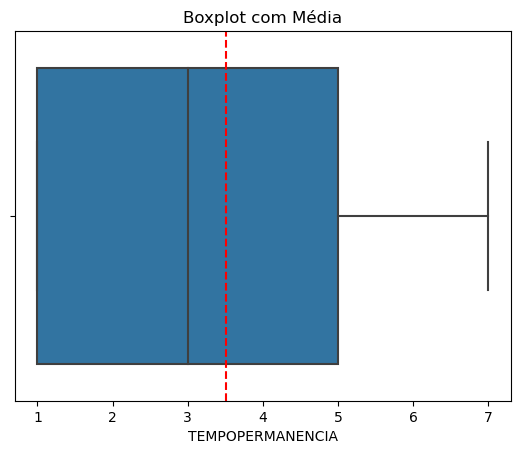

In [112]:
media_tempopermanencia = sum(evadidos["CR"]) / len(evadidos["CR"])
sns.boxplot(x=evadidos["TEMPOPERMANENCIA"])
plt.axvline(x=media_tempopermanencia, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

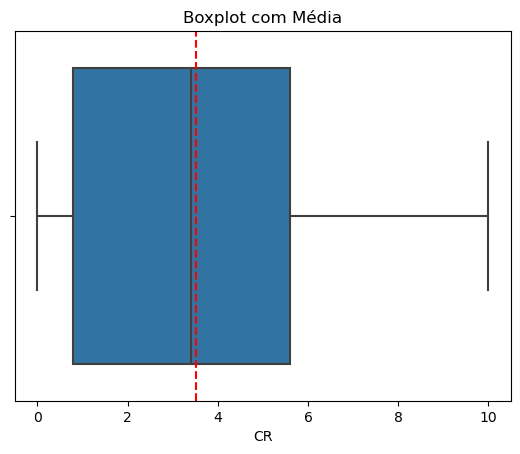

In [113]:
media = sum(evadidos["CR"]) / len(evadidos["CR"])
sns.boxplot(x=evadidos["CR"])
plt.axvline(x=media, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

In [84]:
## Agrupamento - Estado Civil
evadidos.groupby(['ESTADOCIVIL']).size().sort_values(ascending=False)

ESTADOCIVIL
SOLTEIRO    9529
CASADO       307
dtype: int64

Solteiros Evadem mais do que casados.

In [85]:
## Agrupamento - Turno
evadidos.groupby(['TURNOATUAL']).size().sort_values(ascending=False)

TURNOATUAL
INTEGRAL      5607
NOTURNO       3155
MATUTINO       779
VESPERTINO     281
dtype: int64

O turno com mais evasão foi o integral. Será que o CR pode indicar alguma coisa? Turno integral costuma ser mais difícil? A galera que evadiu do turno integral a maior parte era casada ou solteira?

In [86]:
turno_integral = evadidos.query('TURNOATUAL == "INTEGRAL"')
turno_integral.shape

(5607, 28)

In [87]:
turno_integral.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CR,ANODESVINCULACAO,IDADE,CHCURSADA,TEMPOPERMANENCIA
count,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000
mean,599.077368,639.973569,593.928554,682.559140,725.419119,3.659681,2015.275905,26.079543,419.544498,2.995363
std,52.656725,66.257285,68.537164,92.813035,130.695889,2.712016,1.772273,5.767875,519.920909,1.721922
min,286.500000,327.300000,273.100000,327.500000,140.000000,0.000000,2012.000000,21.000000,0.000000,1.000000
25%,571.000000,600.100000,554.050000,627.000000,640.000000,1.200000,2014.000000,23.000000,32.000000,1.000000
50%,603.700000,645.700000,598.800000,689.200000,720.000000,3.600000,2015.000000,24.000000,252.000000,3.000000
75%,633.500000,685.400000,639.900000,747.450000,820.000000,5.800000,2017.000000,26.000000,600.000000,4.000000
max,786.000000,885.500000,802.600000,942.600000,1000.000000,10.000000,2018.000000,64.000000,6070.000000,7.000000


<Axes: xlabel='CR'>

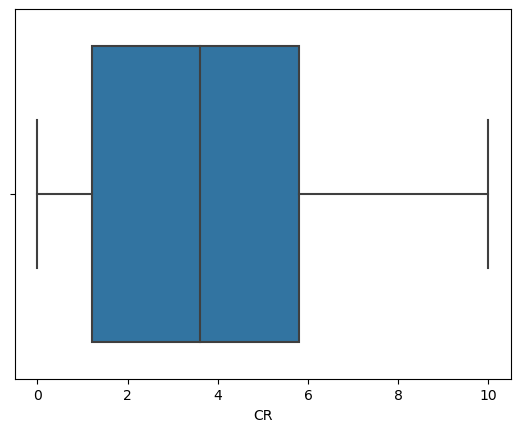

In [88]:
sns.boxplot(x=turno_integral["CR"])

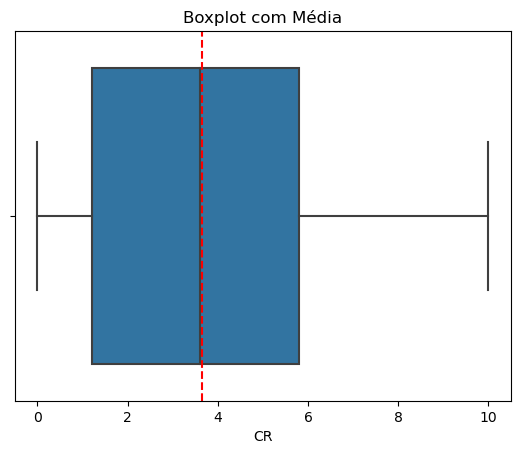

In [92]:
media = sum(turno_integral["CR"]) / len(turno_integral["CR"])
sns.boxplot(x=turno_integral["CR"])
plt.axvline(x=media, color='r', linestyle='--', label='Média')
plt.title('Boxplot com Média')
plt.show()

In [96]:
turno_integral.columns

Index(['CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS',
       'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO'],
      dtype='object')

In [94]:
turno_integral.groupby(['SEXO']).size().sort_values(ascending=False)

SEXO
M    2946
F    2661
dtype: int64

In [101]:
turno_integral.groupby(['ESTADOCIVIL']).size().sort_values(ascending=False)

ESTADOCIVIL
SOLTEIRO    5501
CASADO       106
dtype: int64

In [98]:
turno_integral.groupby(['IDADE']).size().sort_values(ascending=False)

IDADE
24.0    1268
23.0    1266
25.0     674
22.0     588
26.0     408
27.0     275
28.0     178
29.0     141
30.0     108
31.0      83
33.0      72
32.0      71
35.0      50
21.0      43
37.0      40
34.0      39
39.0      30
36.0      29
38.0      27
42.0      19
45.0      17
41.0      16
50.0      13
47.0      12
52.0      11
43.0      11
44.0      10
40.0      10
46.0       9
49.0       9
51.0       9
54.0       9
55.0       9
53.0       8
48.0       8
62.0       7
56.0       7
60.0       6
57.0       5
63.0       4
59.0       3
58.0       2
64.0       2
61.0       1
dtype: int64

In [42]:
## Agrupamento - Carga Horária Cursada
evadidos.groupby(['CHCURSADA']).size().sort_values(ascending=False)

CHCURSADA
0.0       2571
60.0       521
300.0      372
240.0      304
180.0      280
          ... 
1024.0       1
1022.0       1
1019.0       1
1013.0       1
6070.0       1
Length: 1007, dtype: int64

In [50]:
## Agrupamento - Ano Ingresso
evadidos.groupby(['ANOINGRESSO']).size().sort_values(ascending=False)


ANOINGRESSO
2013    4097
2014    4034
2012    1705
dtype: int64

In [43]:
evadidos.describe()

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CR,ANODESVINCULACAO,IDADE,CHCURSADA,TEMPOPERMANENCIA
count,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000
mean,592.826474,631.829046,579.529880,664.854168,707.764843,3.506476,2015.232615,27.190525,379.498373,2.995832
std,56.995818,71.670834,71.169209,98.845579,134.614623,2.749451,1.819227,6.850402,483.185861,1.759362
min,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,2012.000000,21.000000,0.000000,1.000000
25%,563.375000,589.100000,538.300000,606.975000,620.000000,0.800000,2014.000000,23.000000,0.000000,1.000000
50%,598.900000,638.700000,585.100000,673.750000,720.000000,3.400000,2015.000000,25.000000,240.000000,3.000000
75%,630.225000,681.000000,627.400000,733.200000,800.000000,5.602500,2017.000000,28.000000,540.000000,5.000000
max,786.000000,885.500000,845.200000,955.200000,1000.000000,10.000000,2018.000000,64.000000,6070.000000,7.000000


In [44]:
evadidos['ANODESVINCULACAO'].max()

2018.0

In [115]:
correlacao = evadidos['TEMPOPERMANENCIA'].corr(evadidos['CR'])
print(correlacao)

0.3677681584745719


Correlação fraca. No caso específico do coeficiente de correlação 0.3688, ele está mais próximo de 0 do que de -1 ou 1, indicando uma correlação fraca. Isso significa que existe uma relação, mas ela não é muito forte.

In [116]:
correlacao = evadidos['CHCURSADA'].corr(evadidos['CR'])
print(correlacao)

0.5888844513529359


In [117]:
correlacao = evadidos['TEMPOPERMANENCIA'].corr(evadidos['CHCURSADA'])
print(correlacao)

0.5083540929200651


In [118]:
correlacao = evadidos['IDADE'].corr(evadidos['CR'])
print(correlacao)

-0.1435484468875395
